# 1. Đọc dữ liệu

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv("/kaggle/input/tieuchi2/video_study_stats.csv")
df

,user_id,video_id,total_study_time,frequency,time_label,freq_label
0,U_112,V_1395633,157.45,4,High,Medium
1,U_112,V_1395635,35.00,1,Medium,Low
2,U_112,V_1395636,52.50,1,Medium,Low
3,U_112,V_1395639,12.50,2,Low,Medium
4,U_112,V_6210799,319.25,4,High,Medium
...,...,...,...,...,...,...
21295742,U_36053916,V_8156324,9.50,1,Low,Low
21295743,U_36053934,V_6268956,155.00,1,High,Low
21295744,U_36053946,V_6388141,10.00,1,Low,Low
21295745,U_36053952,V_8244595,45.00,6,Medium,High


In [2]:
# Đọc file course-video để liên kết đến khóa học
course_video_df = pd.read_csv("/kaggle/input/course-video/course_video.csv")
course_video_df = course_video_df[['course_id', 'resource_id']]
course_video_df.rename(columns={'resource_id': 'video_id'}, inplace=True)
course_video_df

,course_id,video_id
0,C_674903,V_35117
1,C_674903,V_35118
2,C_674903,V_35119
3,C_674903,V_35120
4,C_674903,V_35121
...,...,...
65914,C_893812,V_1058509
65915,C_893812,V_1058510
65916,C_893812,V_1058511
65917,C_893812,V_1058512


In [3]:
# Merged dữ liệu quy về khóa học 
import pandas as pd

# Kết hợp dữ liệu từ course_video_df và df dựa trên video_id
merged_df = pd.merge(course_video_df, df, on='video_id', how='inner')

# Đảm bảo 'course_id' đứng đầu tiên
merged_df = merged_df[['course_id', 'user_id', 'video_id', 'total_study_time', 'frequency', 'time_label', 'freq_label']]

# Lưu kết quả vào file CSV nếu cần
output_path = '/kaggle/working/merged_course_video_data.csv'
merged_df.to_csv(output_path, index=False)

In [4]:
# Hiển thị kết quả
merged_df

,course_id,user_id,video_id,total_study_time,frequency,time_label,freq_label
0,C_674920,U_97963,V_1641825,265.1,1,High,Low
1,C_674920,U_5146831,V_1641825,289.9,2,High,Medium
2,C_674920,U_9013964,V_1641825,315.0,2,High,Medium
3,C_674920,U_13503162,V_1641825,320.0,2,High,Medium
4,C_674920,U_14791778,V_1641825,74.5,9,High,High
...,...,...,...,...,...,...,...
117358,C_697828,U_11959429,V_559945,241.4,1,High,Low
117359,C_697828,U_11959429,V_559946,79.8,1,High,Low
117360,C_697828,U_11959429,V_559947,227.3,2,High,Medium
117361,C_697828,U_11959429,V_559948,370.7,2,High,Medium


In [5]:
# Đếm số lượng khóa học (unique course_id)
num_courses = merged_df['course_id'].nunique()

# In kết quả
print(f"Số lượng khóa học trong bộ dữ liệu: {num_courses}")

Số lượng khóa học trong bộ dữ liệu: 304


# 2. Gán nhãn mới
Tiêu chí gán nhãn theo TC2, nhóm áp dụng logic sau:
- Nếu cả time_label và freq_label đều thấp (Low), thì nhãn mới sẽ là 1.
- Nếu một trong hai nhãn time_label hoặc freq_label có giá trị Medium và còn lại là Low, thì nhãn mới sẽ là 2.
- Nếu một trong hai nhãn time_label hoặc freq_label có giá trị High và còn lại là Low hoặc Medium, thì nhãn mới sẽ là 3.
- Nếu cả hai nhãn time_label và freq_label đều có giá trị Medium, nhãn mới sẽ là 4.
- Nếu cả hai nhãn đều có giá trị High, nhãn mới sẽ là 5.

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Giả sử merged_df là DataFrame đã có các thông tin cần thiết

# Chuyển đổi các thuộc tính phân loại 'time_label' và 'freq_label' thành các giá trị số
label_encoder = LabelEncoder()

# Giả sử time_label và freq_label có các giá trị như sau: Low = 1, Medium = 2, High = 0
merged_df['time_label_encoded'] = label_encoder.fit_transform(merged_df['time_label'])
merged_df['freq_label_encoded'] = label_encoder.fit_transform(merged_df['freq_label'])

# Hàm gán nhãn mới theo quy tắc đã cho
def assign_new_label(row):
    if row['time_label_encoded'] == 1 and row['freq_label_encoded'] == 1:
        return 1  # Cả hai đều Low -> nhãn 1
    elif (row['time_label_encoded'] == 1 and row['freq_label_encoded'] == 2) or \
         (row['time_label_encoded'] == 2 and row['freq_label_encoded'] == 1):
        return 2  # Một trong hai là Low và một là Medium -> nhãn 2
    elif (row['time_label_encoded'] == 1 and row['freq_label_encoded'] == 0) or \
         (row['time_label_encoded'] == 0 and row['freq_label_encoded'] == 1):
        return 3  # Một trong hai là Low và một là High -> nhãn 3
    elif row['time_label_encoded'] == 2 and row['freq_label_encoded'] == 2:
        return 4  # Cả hai đều Medium -> nhãn 4
    else:
        return 5  # Cả hai đều High/High-Medium hoặc Medium-High -> nhãn 5

# Áp dụng logic gán nhãn mới
merged_df['new_label'] = merged_df.apply(assign_new_label, axis=1)

# Lưu kết quả vào file CSV nếu cần
output_path = '/kaggle/working/merged_with_new_labels.csv'
merged_df.to_csv(output_path, index=False)
# Hiển thị kết quả phân cụm và nhãn mới
merged_df[['course_id', 'user_id', 'video_id', 'total_study_time', 'frequency', 'time_label', 'freq_label', 'new_label']].head()
merged_df.head()

,course_id,user_id,video_id,total_study_time,frequency,time_label,freq_label,time_label_encoded,freq_label_encoded,new_label
0,C_674920,U_97963,V_1641825,265.1,1,High,Low,0,1,3
1,C_674920,U_5146831,V_1641825,289.9,2,High,Medium,0,2,5
2,C_674920,U_9013964,V_1641825,315.0,2,High,Medium,0,2,5
3,C_674920,U_13503162,V_1641825,320.0,2,High,Medium,0,2,5
4,C_674920,U_14791778,V_1641825,74.5,9,High,High,0,0,5


## Gán nhãn cho khóa học

In [7]:
import pandas as pd

# Giả sử merged_df là DataFrame chứa dữ liệu đã có các cột cần thiết
# Nhóm theo course_id và tính trung bình nhãn mới cho từng khóa học
course_avg_labels = merged_df.groupby('course_id')['new_label'].mean().reset_index()

# Làm tròn giá trị trung bình nhãn về 1, 2, 3, 4, 5
course_avg_labels['new_label'] = course_avg_labels['new_label'].round()

# Đảm bảo nhãn nằm trong khoảng từ 1 đến 5
course_avg_labels['new_label'] = course_avg_labels['new_label'].clip(1, 5)

# Lưu kết quả vào file CSV nếu cần
output_path = '/kaggle/working/label3_course.csv'
course_avg_labels.to_csv(output_path, index=False)

In [8]:
# Hiển thị kết quả
course_avg_labels[['course_id', 'new_label']]

,course_id,new_label
0,C_1159827,4.0
1,C_1410156,3.0
2,C_1428968,3.0
3,C_1429002,2.0
4,C_1434593,4.0
...,...,...
299,C_948433,5.0
300,C_948435,3.0
301,C_948468,4.0
302,C_948486,4.0


# 3. Biểu đồ đã được gán nhãn theo TC2

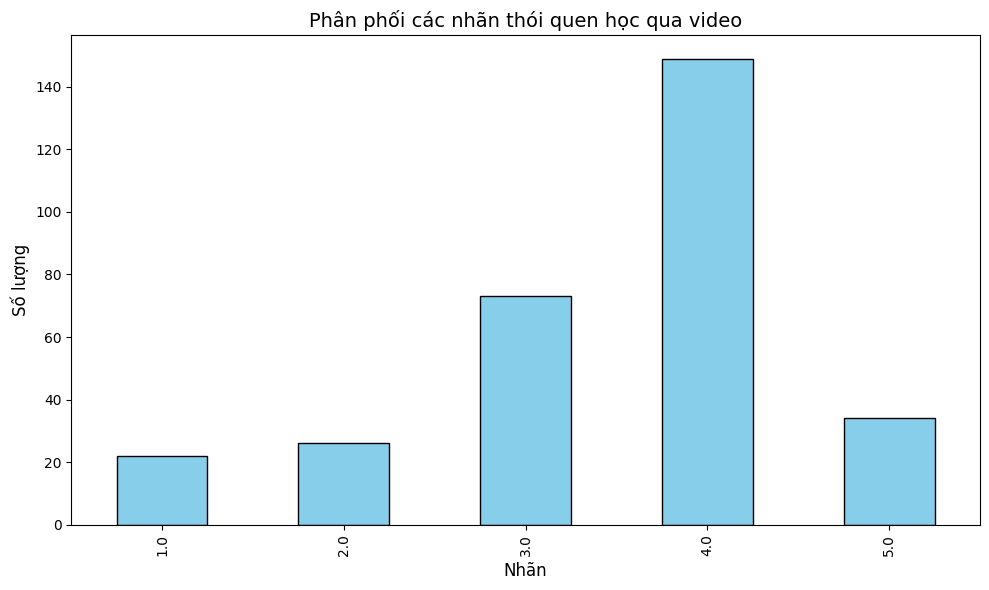

In [9]:
import matplotlib.pyplot as plt

# Hiển thị biểu đồ phân bố các nhãn
plt.figure(figsize=(10, 6))
course_avg_labels['new_label'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Phân phối các nhãn thói quen học qua video', fontsize=14)
plt.xlabel('Nhãn', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.tight_layout()
plt.show()